In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('heart_short.xlsx',sheet_name="data")
df

,age,t_index,f_status,c_index,target
0,63,145,1,233,1
1,37,130,0,250,1
2,41,130,0,204,1
3,56,120,0,236,1
4,57,120,0,354,1
5,57,140,0,192,1
6,56,140,0,294,1
7,44,120,0,263,1
8,52,172,1,199,1
9,57,150,0,168,1


In [ ]:
# Thực hiện việc tách dữ liệu đầu vào (input) và đầu ra (output) từ DataFrame df thành các mảng numpy.
X = df[['age','t_index','f_status','c_index']].values # input
y = df[['target']].values # output

In [ ]:
# thao tác chuyển đổi kiểu dữ liệu (type casting) cho các mảng X và y thành kiểu dữ liệu
X = X.astype(float)
y = y.astype(float)

In [ ]:
# X: Là mảng dữ liệu đầu vào (features), ví dụ như các cột trong bảng dữ liệu mà bạn sử dụng để huấn luyện mô hình.
# y: Là mảng dữ liệu đầu ra (target), ví dụ như cột mục tiêu bạn muốn dự đoán.
# test_size=0.3: Chỉ định tỷ lệ dữ liệu được sử dụng để tạo tập kiểm tra.
    #  Ở đây, 0.3 có nghĩa là 30% dữ liệu sẽ được dùng cho tập kiểm tra (X_test và y_test), còn 70% còn lại sẽ dùng cho tập huấn luyện (X_train và y_train).
# random_state=16: Tham số này đảm bảo rằng việc chia dữ liệu được thực hiện một cách ngẫu nhiên nhưng có thể tái lặp lại.
    #  Khi bạn sử dụng một giá trị cố định như 16, mỗi lần chia sẽ cho ra kết quả giống nhau.
    #  Điều này giúp bạn dễ dàng tái tạo kết quả trong các lần chạy mã khác nhau.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=16)

In [ ]:
# KNeighborsClassifier(n_neighbors=5): Tạo một đối tượng mô hình phân loại KNN với tham số n_neighbors=5, 
    # có nghĩa là thuật toán sẽ tìm kiếm 5 láng giềng gần nhất (neighbors) của mỗi điểm dữ liệu mới khi phân loại.

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
# Huấn luyện mô hình với dữ liệu huấn luyện
knnModel.fit(X_train, y_train)


c:\Users\thegi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Phương thức predict() sẽ sử dụng mô hình KNN đã được huấn luyện (knnModel) để dự đoán nhãn (label) cho các điểm dữ liệu trong X_test.
    #  Dữ liệu này sẽ được phân loại dựa trên 5 láng giềng gần nhất trong không gian đặc trưng.
# Dữ liệu đầu vào X_test là một mảng các đặc trưng của bộ dữ liệu kiểm tra, và mô hình sẽ trả về các nhãn phân loại tương ứng cho mỗi điểm trong X_test
y_test_predicted =knnModel.predict(X_test)
y_test_predicted

array([0., 0., 0., 0., 0., 0.])

In [ ]:
# Hàm accuracy_score so sánh nhãn thực tế trong y_test với nhãn dự đoán trong y_test_predicted.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted)
# kết luận: Điều này có nghĩa là 80% số dự đoán là chính xác (4 trong số 5 mẫu được phân loại đúng).

0.6666666666666666

In [12]:
# tính toán ma trận nhầm lẫn (confusion matrix) giữa nhãn thực tế (y_test) và nhãn dự đoán (y_test_predicted) cho mô hình phân loại.
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix

array([[4, 0],
       [2, 0]])

In [ ]:
# viết sẽ tính toán các chỉ số precision, recall, và F1-score từ ma trận nhầm lẫn.
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    vprecision = tp/(tp+fp)
    vrecall = tp/(tp+fn)
    vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

    return vprecision,vrecall,vf1
print("precision, recall, f1:", myscores(cf_matrix))

precision, recall, f1: (np.float64(1.0), np.float64(0.6666666666666666), np.float64(0.8))


In [ ]:
# Điều này có nghĩa là mô hình có độ chính xác (precision), độ nhạy (recall) và điểm F1 đều là 0.67.

In [ ]:
#  báo cáo phân loại cho hiệu suất của mô hình.
    #  Báo cáo này bao gồm các chỉ số quan trọng như Precision (Độ chính xác), Recall (Độ bao phủ), F1-Score, và Support cho mỗi lớp
    #  (trong trường hợp của bạn là 'Không bệnh' và 'Có bệnh'), cùng với độ chính xác tổng thể của mô hình. 
    # Dưới đây là một giải thích chi tiết về các chỉ số trong báo cáo
from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))


              precision    recall  f1-score   support

  Không bệnh       0.67      1.00      0.80         4
     Có bệnh       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



c:\Users\thegi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thegi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thegi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

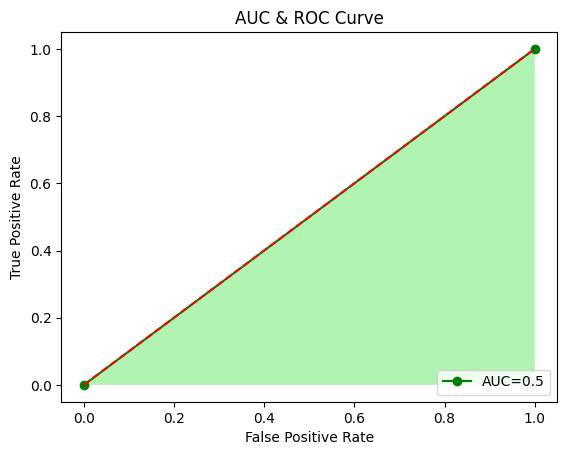

In [ ]:
# đồ thị ROC (Receiver Operating Characteristic) và tính toán AUC (Area Under the Curve), một chỉ số quan trọng để đánh giá mô hình phân loại, 
# đặc biệt là trong trường hợp có nhiều lớp hoặc mất cân bằng lớp.
from sklearn import metrics

# Dự đoán xác suất của các lớp dương tính (ở đây là lớp 'Có bệnh') trên tập kiểm tra (X_test).
#  Hàm predict_proba trả về một mảng với xác suất của mỗi lớp, và [::,1] lấy xác suất của lớp dương tính.
y_pred_proba = knnModel.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Vẽ đường cong ROC với trục hoành là FPR và trục tung là TPR.
#  Dấu 'go-' chỉ ra rằng các điểm dữ liệu trên đồ thị sẽ được đánh dấu bằng dấu chấm tròn màu xanh lá cây.
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()
# AUC gần 1: Mô hình có khả năng phân biệt giữa các lớp rất tốt.
# AUC gần 0.5: Mô hình gần như phân loại ngẫu nhiên.
# AUC < 0.5: Mô hình phân loại sai, khả năng phân biệt giữa các lớp kém.

In [ ]:
# Kết luận:
# AUC = 0.5: Điều này cho thấy mô hình của bạn không hiệu quả trong việc phân loại dữ liệu và có thể cần được cải thiện.
# Đường chéo đỏ đại diện cho mô hình phân loại ngẫu nhiên, nên nếu AUC của bạn bằng 0.5, mô hình không học được bất kỳ mối quan hệ hữu ích nào từ dữ liệu.
# Bạn có thể thử lại với các phương pháp khác như cải tiến mô hình hoặc tối ưu hóa tham số để cải thiện khả năng phân loại.

In [ ]:
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))
import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))
v1 = float(input('age: '))
v2 = float(input('t_index: '))
v3 = float(input('f_status: '))
v4 = float(input('c_index: '))

y_pred = loaded_model.predict([[v1,v2,v3,v4]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")